# Lecture 3: Entropy and Data Compression (II)
- Shannon's Source Coding Theorem
- The Bent Coin Lottery

## Information Content
Given a random variable $X$ with probability mass function ${\displaystyle p_{X}{\left(x\right)}}$, the self-information of measuring $X$ as outcome $x$ is defined as:

$${\displaystyle \operatorname {I} _{X}(x):=-\log {\left[p_{X}{\left(x\right)}\right]}=\log {\left({\frac {1}{p_{X}{\left(x\right)}}}\right)}.}$$

## Entropy
Information entropy is the average rate at which information is produced by a stochastic source of data.

The measure of information entropy associated with each possible data value is the negative logarithm of the probability mass function for the value:

$$S=-\sum _{i}P_{i}\log {P_{i}}=-\operatorname {E} _{P}[\log P]$$

## Source coding theorem
N random variables each with entropy H(X) can be compressed into more than N H(X) bits with negligible risk of information loss, as N → ∞; but conversely, if they are compressed into fewer than N H(X) bits it is virtually certain that information will be lost.

### Example
- If we toss a fair coin 100 times, then we need [N=100] x [H(X)=1] = 100 bits to compress that information
- If we toss a biased coin (heads=0.8), then we need [N=100] x [H(X)=0.72] = 72 bits to compress that information

In [48]:
import numpy as np
import matplotlib as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format='retina'


In [49]:
def IC(px):
    return np.log2(1/px)


IC(0.5)

1.0

In [50]:
def entropy(pxs):
    parts = [px*IC(px) for px in pxs]
    return sum(parts)

print(entropy([0.5, 0.5]))
print(entropy([0.2, 0.8]))
print(entropy([0.1, 0.9]))

1.0
0.7219280948873623
0.46899559358928133


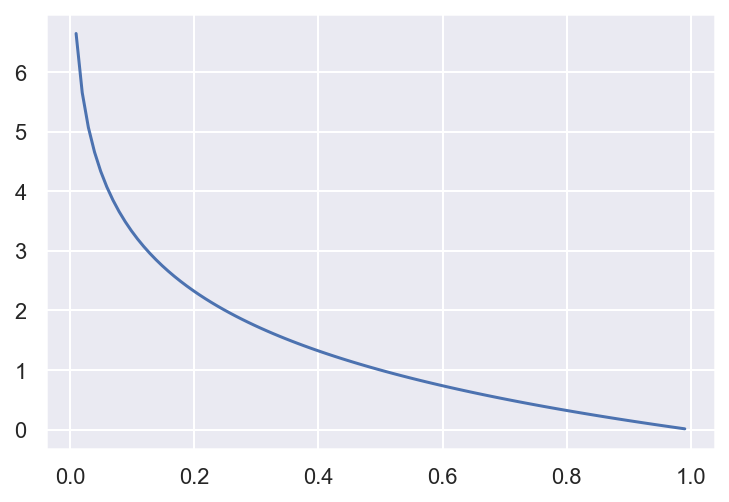

In [51]:
## how does the value of px affect the information content of x
pxs = np.linspace(0.01, 0.99, 100)
ics = IC(pxs)

sns.lineplot(x=pxs, y=ics)

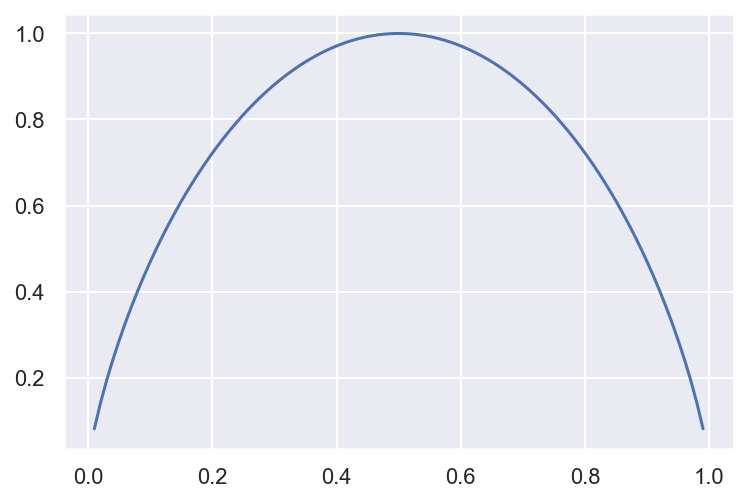

In [52]:
## For a coin toss example, which coin produces the biggest entropy?

pheads = np.linspace(0.01, 0.99, 100)
ptails = 1 - pheads

zipped = list(zip(pheads, ptails))
entropies = [entropy(z) for z in zipped]

sns.lineplot(pheads, entropies)

## the fair coin (p=0.5) produces the largest entropy